# Importing Libararies & Loading Data


In [51]:
# Importing Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


#Loading Data
df = pd.read_csv(r"C:\Users\DELL\Desktop\raw.csv")
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom


# Data Preparation & Cleaning

### Step 1 Dataset Overview

In [52]:
# Basic information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [53]:
# Statistics summary of numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


### Step 2 Handling Missing Values

In [54]:
# Calculate the count of null values per column
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [55]:
# Removing null values
df = df.dropna(subset=["CustomerID"])

In [56]:
# Verifing  the removal of missing values
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [57]:
# Checking the shape
df.shape

(406829, 8)

### Step 3 Handlling Duplicates 

In [58]:
# Check for duplicate rows
duplicates = df.duplicated()

# Count duplicate rows
print(duplicates.sum())

5225


In [59]:
df[duplicates]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12-01-2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12-01-2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12-01-2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12-01-2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12-01-2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12-09-2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12-09-2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12-09-2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12-09-2011 11:34,2.10,14446.0,United Kingdom


In [60]:
# Remove duplicates
df = df.drop_duplicates()

# Reset the index after dropping duplicates

# Here drop = True removes the previous indices

df.reset_index(drop=True, inplace= True)

### Step 4 Removing cancelled orders

In [61]:
# Count of rows wich quantity is less then 0 
df[df["Quantity"]<0].shape[0]

8872

In [62]:
# Exploring the rows for which quantity is less than 0
df[df["Quantity"] < 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12-01-2010 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12-01-2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12-01-2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12-01-2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12-01-2010 10:24,0.29,17548.0,United Kingdom


In [63]:
# Store negative quantity rows 
# These will be required if we want to analyse the cancelled orders later-on
df_cancelled = df[df["Quantity"] < 0]

In [64]:

# Keep only rows with Quantity ≥ 0
df = df[df["Quantity"] >= 0]

In [65]:
# Checking the shape of the orginal dataframe
df.shape

(392732, 8)

### Step 5 Further Exploring The Columns

In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,392732.0,13.153718,181.588420,1.0,2.00,6.00,12.00,80995.00
UnitPrice,392732.0,3.125596,22.240725,0.0,1.25,1.95,3.75,8142.75
CustomerID,392732.0,15287.734822,1713.567773,12346.0,13955.00,15150.00,16791.00,18287.00


In [67]:
df.describe(include = "object").T

,count,unique,top,freq
InvoiceNo,392732,18536,576339,542
StockCode,392732,3665,85123A,2023
Description,392732,3877,WHITE HANGING HEART T-LIGHT HOLDER,2016
InvoiceDate,392732,17286,11/14/2011 15:27,542
Country,392732,37,United Kingdom,349227


In [68]:
# creating new column of TotalPrice
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"] 
df.head()



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [69]:
#total revenue in dataset
TotalRevenue = df["TotalPrice"].sum()
print(TotalRevenue)

8887208.894


In [70]:
#unique customer numbers 
Unique_Customers = df["CustomerID"].nunique()
print(Unique_Customers)

4339


In [71]:
# Revenue contribution by each customer
customer_revenue = df.groupby("CustomerID")["TotalPrice"].sum().sort_values(ascending=False)


In [72]:
# Top 10 customers
print("Top 10 Customers by Revenue:")
print(customer_revenue.head(10))

Top 10 Customers by Revenue:
CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194390.79
16446.0    168472.50
14911.0    143711.17
12415.0    124914.53
14156.0    117210.08
17511.0     91062.38
16029.0     80850.84
12346.0     77183.60
Name: TotalPrice, dtype: float64


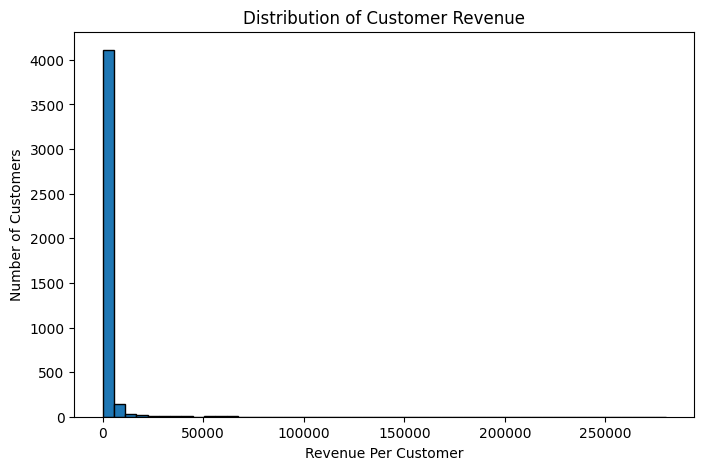

In [73]:
# Plot revenue distribution
plt.figure(figsize=(8,5))
plt.hist(customer_revenue, bins= 50,edgecolor="black")
plt.title("Distribution of Customer Revenue")
plt.xlabel("Revenue Per Customer")
plt.ylabel("Number of Customers")
plt.show()

In [74]:
# Calculate both revenue and frequency per customer
customer_summary = df.groupby("CustomerID").agg({
    "TotalPrice": "sum",
    "InvoiceNo": "nunique"
}).rename(columns={"TotalPrice":"Revenue", "InvoiceNo":"Frequency"})

customer_summary.head()


,Revenue,Frequency
CustomerID,,
12346.0,77183.60,1
12347.0,4310.00,7
12348.0,1797.24,4
12349.0,1757.55,1
12350.0,334.40,1


In [75]:
customer_summary["Revenue_Score"] = pd.qcut(
    customer_summary["Revenue"], 5, labels=[1,2,3,4,5]
)

freq_bins   = [0, 1, 3, 5, 10, float("inf")]   # categories of frequency
freq_labels = [1, 2, 3, 4, 5]                  # assign scores
customer_summary["Frequency_Score"] = pd.cut(
    customer_summary["Frequency"], 
    bins=freq_bins, 
    labels=freq_labels, 
    include_lowest=True
)

